In [182]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


In [183]:
# Defining linear regression function comparing income to disease

def regression(domain,disease):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(domain, disease)
    regress_values = domain * slope + intercept
    regression_equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    pearson = st.pearsonr(domain,disease)
    return(regress_values,pearson[0])

In [184]:
# Defining function to view linear comparison of data from each table
count = 0
def graphing(df, x_axis,y_axis):
    global count
    # Call regression function
    (regression_line, pearson_co) = regression(x_axis,y_axis) 
    count = count+1
    print(x_axis.min(),x_axis.max())
    df.plot(x = x_axis.name,y = y_axis.name,kind='scatter',xlim = (x_axis.min(),x_axis.max()), ylim =(y_axis.min(),y_axis.max()))
    plt.xticks(rotation = 45, ha = 'right')
    plt.ticklabel_format(style='plain')
    plt.plot(x_axis,regression_line,'r')
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)
    plt.title(f'{y_axis.name} as a factor of {x_axis.name}')
    plt.annotate(text = f'Pearson Coefficient: {round(pearson_co,2)}', xy=((x_axis.min()+x_axis.max()/10),11))
    plt.show()
    plt.savefig(f'../Output/stats/{count}.png')

In [185]:
# Read in combined CSVs
world = pd.read_csv('../Output/csv/global_combined.csv')
usa = pd.read_csv('../Output/csv/us_combined.csv')
houston = pd.read_csv('../Output/csv/houston_combined.csv')

In [188]:
world.dropna(inplace=True)
world.head(2)

,Unnamed: 0,Entity,Percent with Cardiovascular Disease,Percent with Diabetes & Kidney Disease,Percent with Nutritional Deficiencies,Percent with Cancer,Percent with Chronic Respiratory Diseases,Population,Prevalence of undernourishment (% of population),% of Children with Iron Deficiency,Median Household Income
0,0,Afghanistan,5.091276,1.332399,0.739985,2.228084,0.85720,35739709,25.6,44.9,530.0
1,1,Albania,7.200259,0.840173,0.217940,3.635569,0.64926,3072944,3.9,30.9,5220.0


320.0 87950.0


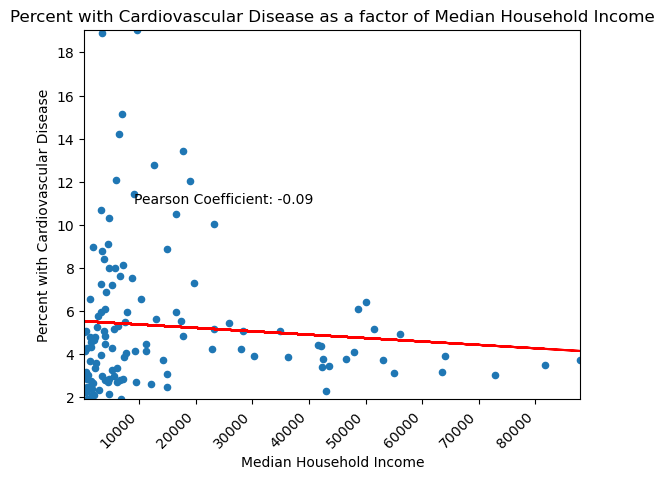

2.5 59.5


<Figure size 640x480 with 0 Axes>

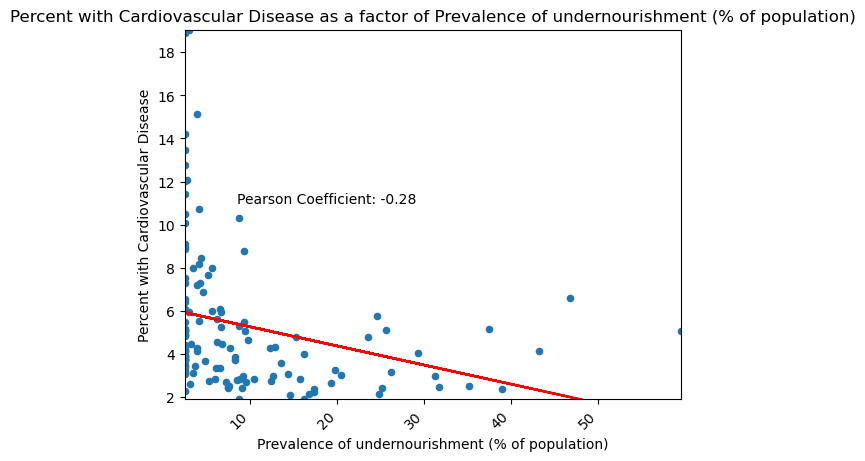

9.8 79.0


<Figure size 640x480 with 0 Axes>

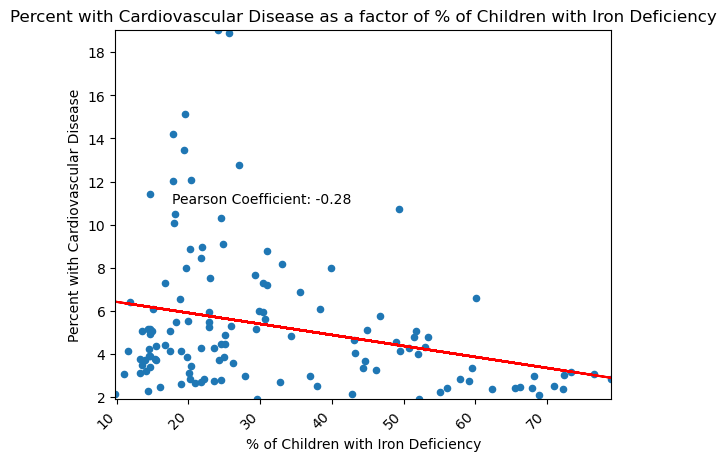

320.0 87950.0


<Figure size 640x480 with 0 Axes>

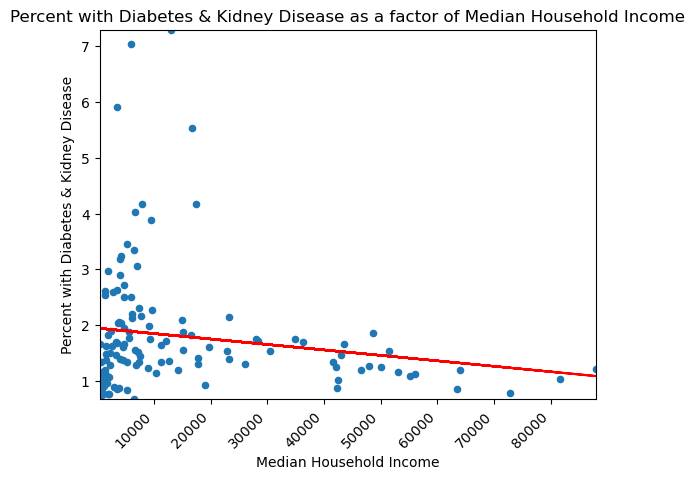

2.5 59.5


<Figure size 640x480 with 0 Axes>

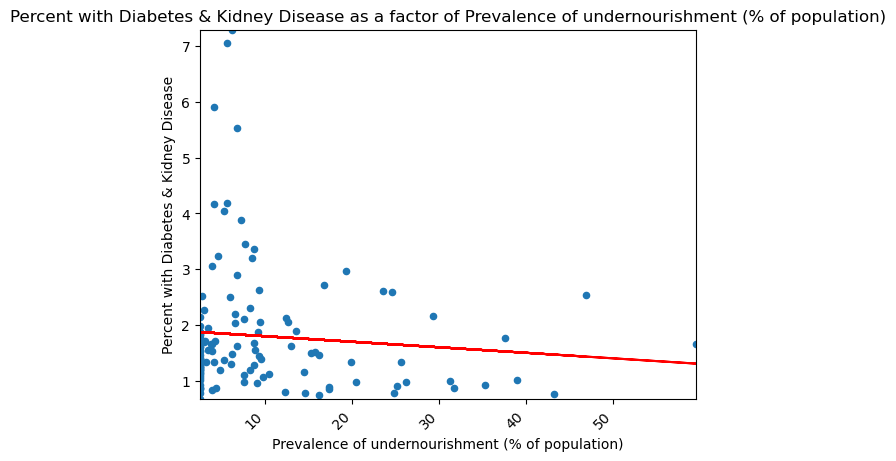

9.8 79.0


<Figure size 640x480 with 0 Axes>

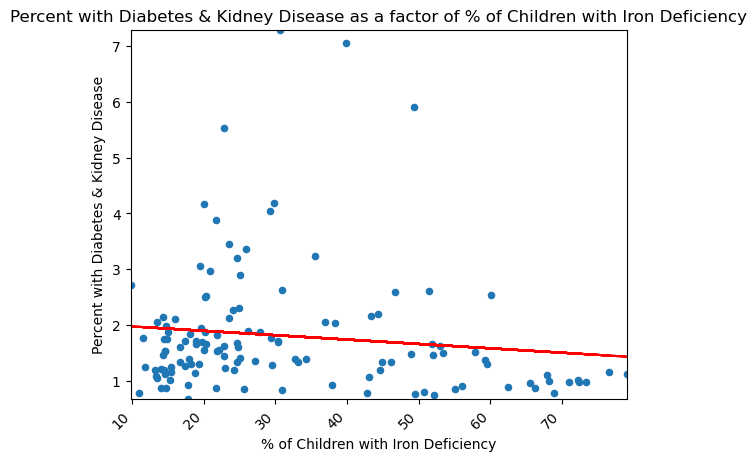

320.0 87950.0


<Figure size 640x480 with 0 Axes>

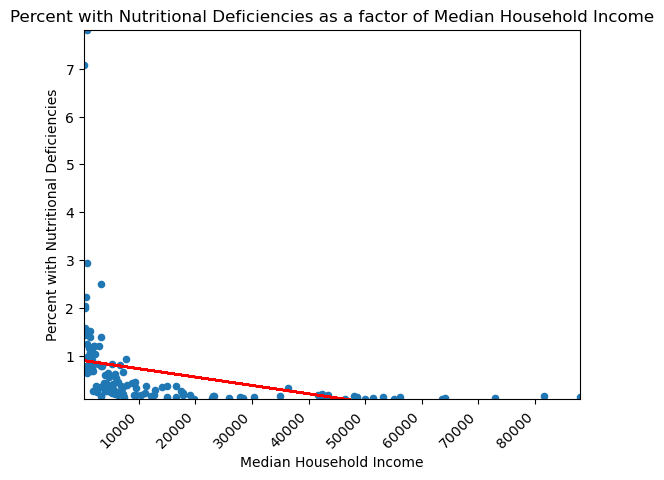

2.5 59.5


<Figure size 640x480 with 0 Axes>

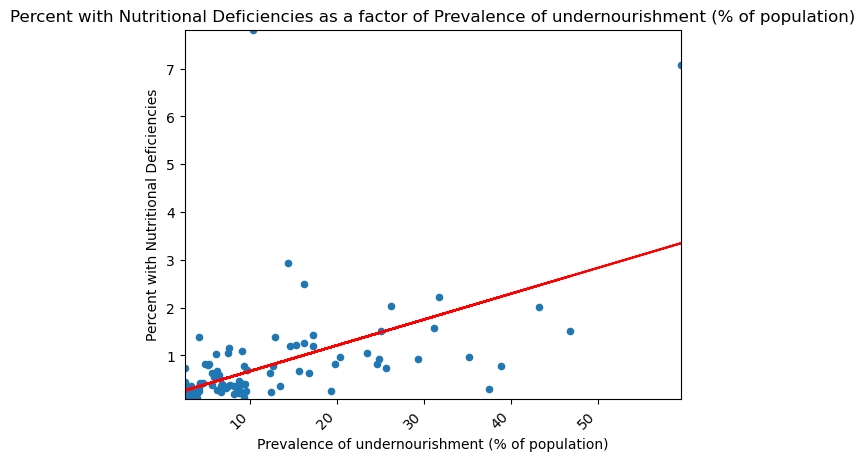

9.8 79.0


<Figure size 640x480 with 0 Axes>

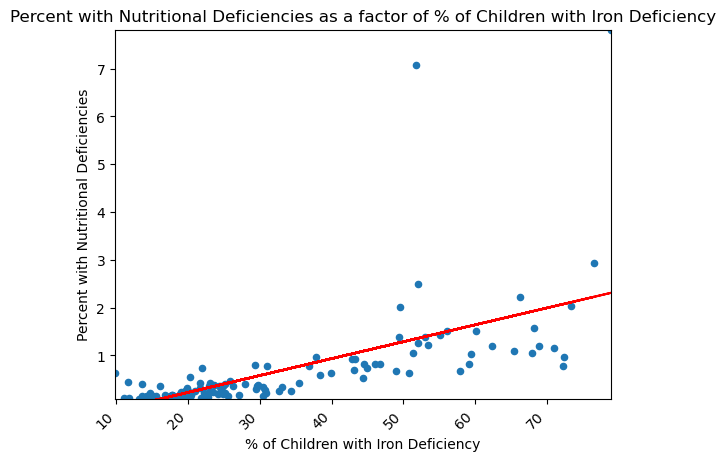

320.0 87950.0


<Figure size 640x480 with 0 Axes>

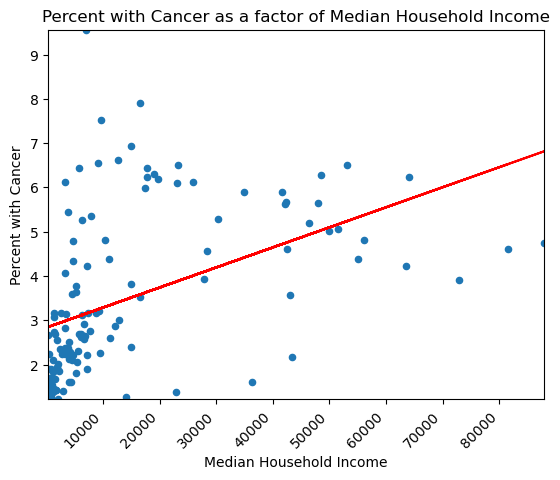

2.5 59.5


<Figure size 640x480 with 0 Axes>

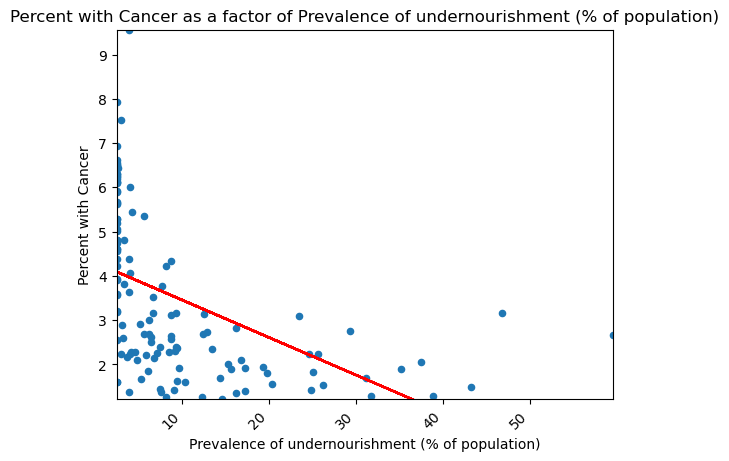

9.8 79.0


<Figure size 640x480 with 0 Axes>

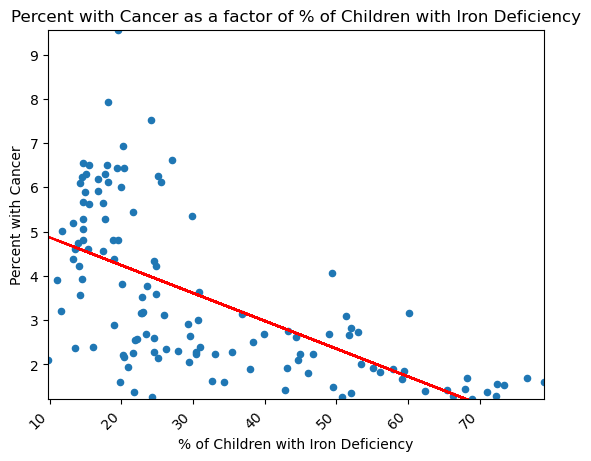

320.0 87950.0


<Figure size 640x480 with 0 Axes>

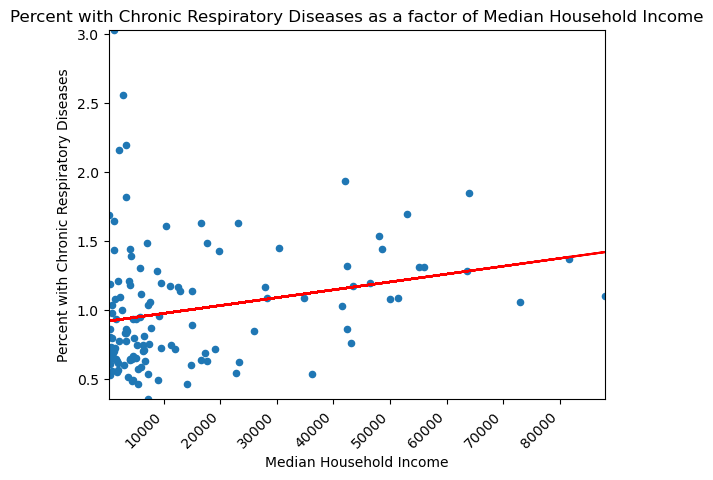

2.5 59.5


<Figure size 640x480 with 0 Axes>

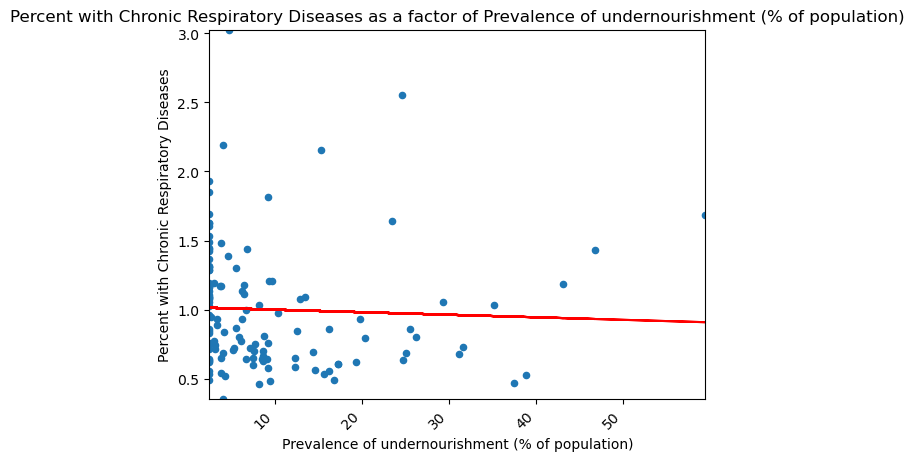

9.8 79.0


<Figure size 640x480 with 0 Axes>

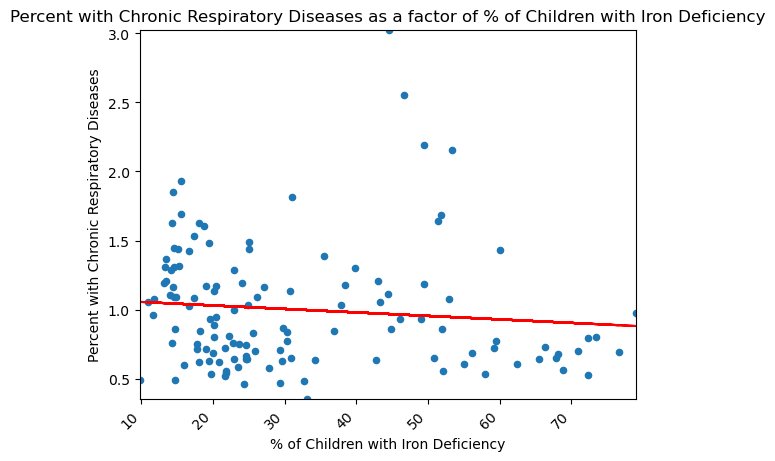

<Figure size 640x480 with 0 Axes>

In [187]:
for column in world.columns:
    if 'Percent' in column:
        graphing(world,world['Median Household Income'],world[column])
        graphing(world,world['Prevalence of undernourishment (% of population)'],world[column])
        graphing(world,world['% of Children with Iron Deficiency'],world[column])